# Analyzing Taxi Trip Data by Taxi Zones

## Imports and Grabbing Data

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
from taxitools import utils
from shapely import wkt
from taxitools import utils
import matplotlib.pyplot as plt

In [2]:
df = utils.open_taxi_clean_df()
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,total_amount,payment_type,trip_type,congestion_surcharge,day_of_week,day_of_month,hour_of_day,trip_duration,total_without_tip,fare_per_mile
0,1,2021-07-01 00:30:52,2021-07-01 00:35:36,N,1,74,168,1,1.20,6.0,...,7.30,2,1,0.0,3,1,0,284.0,7.3,6.08
1,2,2021-07-01 00:25:36,2021-07-01 01:01:31,N,1,116,265,2,13.69,42.0,...,43.30,2,1,0.0,3,1,0,2155.0,43.3,3.16
2,2,2021-07-01 00:05:58,2021-07-01 00:12:00,N,1,97,33,1,0.95,6.5,...,10.14,1,1,0.0,3,1,0,362.0,7.8,8.21
3,2,2021-07-01 00:41:40,2021-07-01 00:47:23,N,1,74,42,1,1.24,6.5,...,7.80,2,1,0.0,3,1,0,343.0,7.8,6.29
4,2,2021-07-01 00:51:32,2021-07-01 00:58:46,N,1,42,244,1,1.10,7.0,...,8.30,2,1,0.0,3,1,0,434.0,8.3,7.55


## Total Pickups and Dropoffs by Taxi Zone

We first begin by grouping the data by pickup location (`PULocationID`). We'll add columns to keep track of some location data and a Count column to indicate how many pickups were made at that location. The displayed table shows the locations with the most pickup trips.

In [3]:
total_pickups = utils.aggregateAndGroup(df, 'PULocationID', None, 'size')
total_pickups_geom = utils.merge_location_data(total_pickups, 'PULocationID', rename_dict = 
                                             {'the_geom':'PUGeom', 'zone': 'PUZone', 'borough': 'PUBorough'})
total_pickups_none = total_pickups_geom.drop('PUGeom', axis=1)
total_pickups_none.sort_values('Count', ascending=False).head(10)

,PULocationID,Count,PUZone,PUBorough
70,74,8674,East Harlem North,Manhattan
71,75,7576,East Harlem South,Manhattan
37,41,4684,Central Harlem,Manhattan
38,42,3124,Central Harlem North,Manhattan
91,95,2399,Forest Hills,Queens
157,166,2345,Morningside Heights,Manhattan
232,244,2228,Washington Heights South,Manhattan
4,7,1755,Astoria,Queens
93,97,1721,Fort Greene,Brooklyn
61,65,1515,Downtown Brooklyn/MetroTech,Brooklyn


The above result shows that Manhattan, Queens, and Brooklyn primarily had the most taxi pickups during the month of July in 2021. Looking at the counts, there does seem to be some high variance in the count, so we will plot a histogram of this data to observe further.

Mean:  319.848 , SD:  861.1109388994948


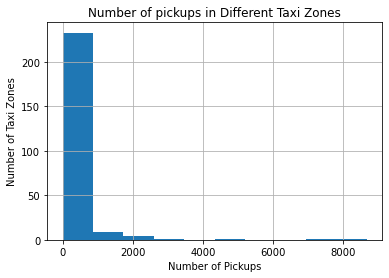

In [4]:
plt.title('Number of pickups in Different Taxi Zones')
plt.xlabel('Number of Pickups')
plt.ylabel('Number of Taxi Zones')
total_pickups_none['Count'].hist();
print('Mean: ', total_pickups_none['Count'].mean(), ', SD: ',
      total_pickups_none['Count'].std())

Since the majority of the taxi zones have around 300 total pickups in the month of July, with a standard. deviation of around 850, we'll reduce the maximum count when plotting the following heatmap so that the color scale fits better for the data and isn't skewed by outliers.

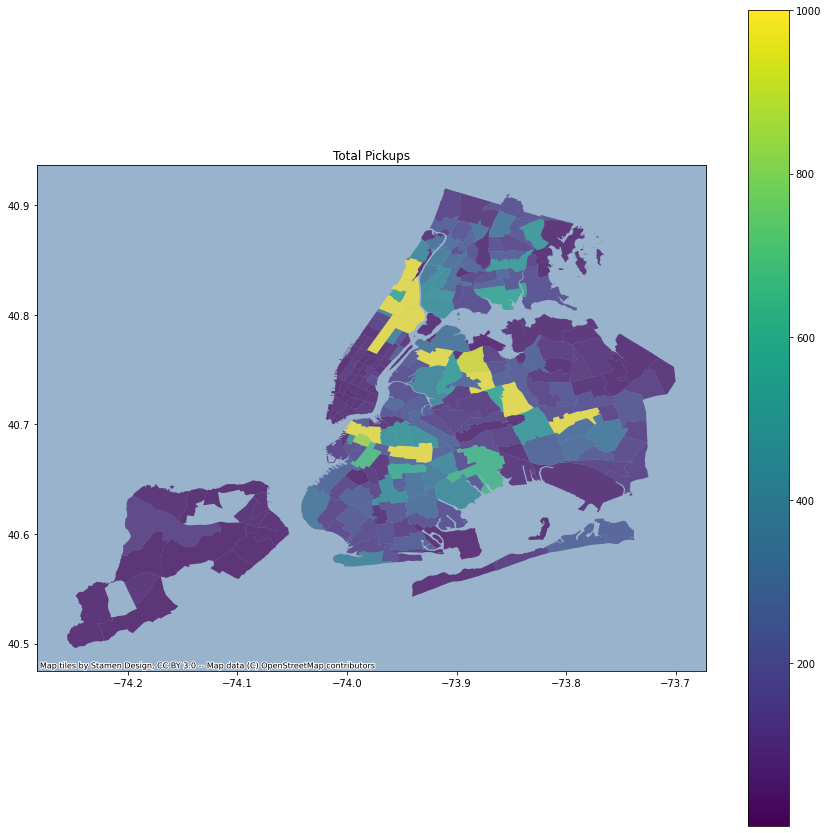

In [5]:
utils.plot_heatmap(total_pickups_geom, 'PUGeom', 'Count', 'Total Pickups', 'pickups_by_location', 1000)

We will now do the same for dropoffs:

In [6]:
total_dropoffs = utils.aggregateAndGroup(df, 'DOLocationID', None, 'size')
total_dropoffs_geom = utils.merge_location_data(total_dropoffs, 'DOLocationID', rename_dict = 
                                             {'the_geom':'DOGeom', 'zone': 'DOZone', 'borough': 'DOBorough'})
total_dropoffs_none = total_dropoffs_geom.drop('DOGeom', axis=1)
total_dropoffs_none.sort_values('Count', ascending=False).head(10)

,DOLocationID,Count,DOZone,DOBorough
73,74,3560,East Harlem North,Manhattan
74,75,3032,East Harlem South,Manhattan
41,42,2831,Central Harlem North,Manhattan
40,41,2477,Central Harlem,Manhattan
229,236,1683,Upper East Side North,Manhattan
231,238,1539,Upper West Side North,Manhattan
160,166,1413,Morningside Heights,Manhattan
237,244,1229,Washington Heights South,Manhattan
255,263,1215,Yorkville West,Manhattan
145,151,1132,Manhattan Valley,Manhattan


Just like for pickups, Manhattan also had the largest number of dropoffs. However, there seems to be much less variance, where the number of pickups seems more evenly spread out amongst taxi zones compared to pickups. We'll examine this next.

Mean:  311.703125 , SD:  439.6654853073962


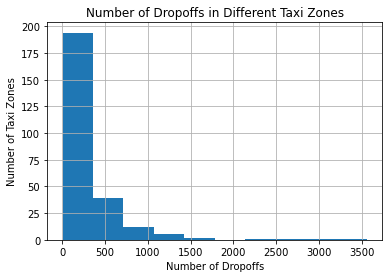

In [7]:
plt.title('Number of Dropoffs in Different Taxi Zones')
plt.xlabel('Number of Dropoffs')
plt.ylabel('Number of Taxi Zones')
total_dropoffs_none['Count'].hist();
print('Mean: ', total_dropoffs_none['Count'].mean(), ', SD: ',
      total_dropoffs_none['Count'].std())

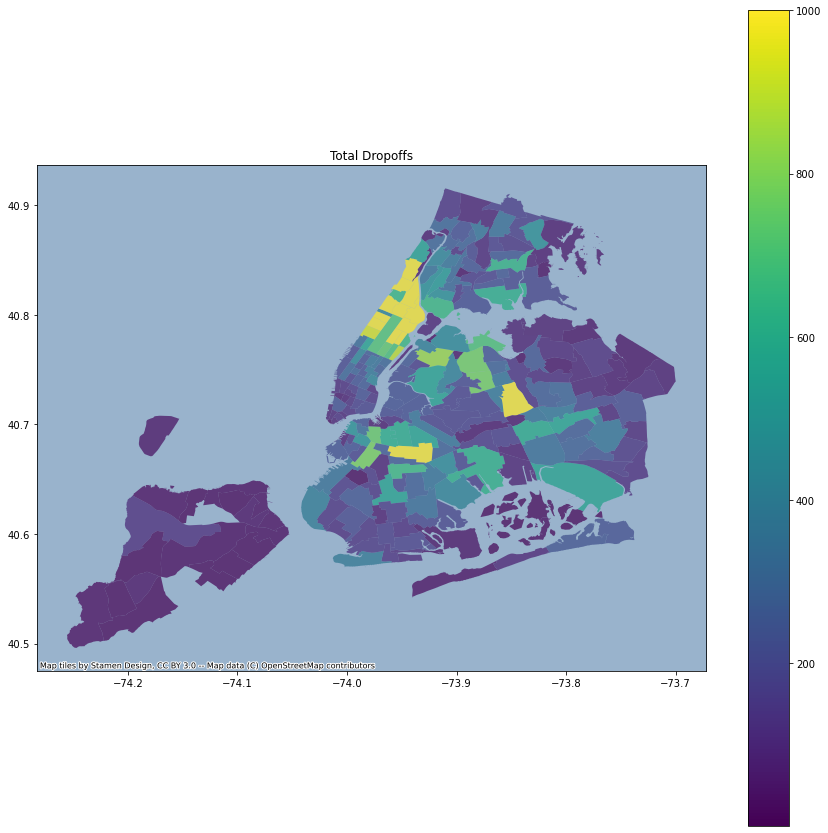

In [8]:
utils.plot_heatmap(total_dropoffs_geom, 'DOGeom', 'Count', 'Total Dropoffs', 'dropoffs_by_location', 1000)

## Fare Per Mile vs. Taxi Zones

In [9]:
fare_per_mile = utils.aggregateAndGroup(df, 'PULocationID', 'fare_per_mile', 'mean', True)
fare_per_mile_geom = utils.merge_location_data(fare_per_mile, 'PULocationID', rename_dict = 
                                             {'the_geom':'PUGeom', 'zone': 'PUZone', 'borough': 'PUBorough'})
fare_per_mile_none = fare_per_mile_geom.drop('PUGeom', axis=1)
fare_per_mile_none.sort_values('fare_per_mile', ascending=False).head(10)


,PULocationID,fare_per_mile,PUZone,PUBorough
129,138,797.387143,LaGuardia Airport,Queens
210,222,64.893631,Starrett City,Brooklyn
181,191,63.773860,Queens Village,Queens
76,80,61.498586,East Williamsburg,Brooklyn
74,78,50.367325,East Tremont,Bronx
185,195,48.665714,Red Hook,Brooklyn
146,155,45.971565,Marine Park/Mill Basin,Brooklyn
88,92,44.287130,Flushing,Queens
206,218,40.316364,Springfield Gardens North,Queens
178,188,40.035890,Prospect-Lefferts Gardens,Brooklyn


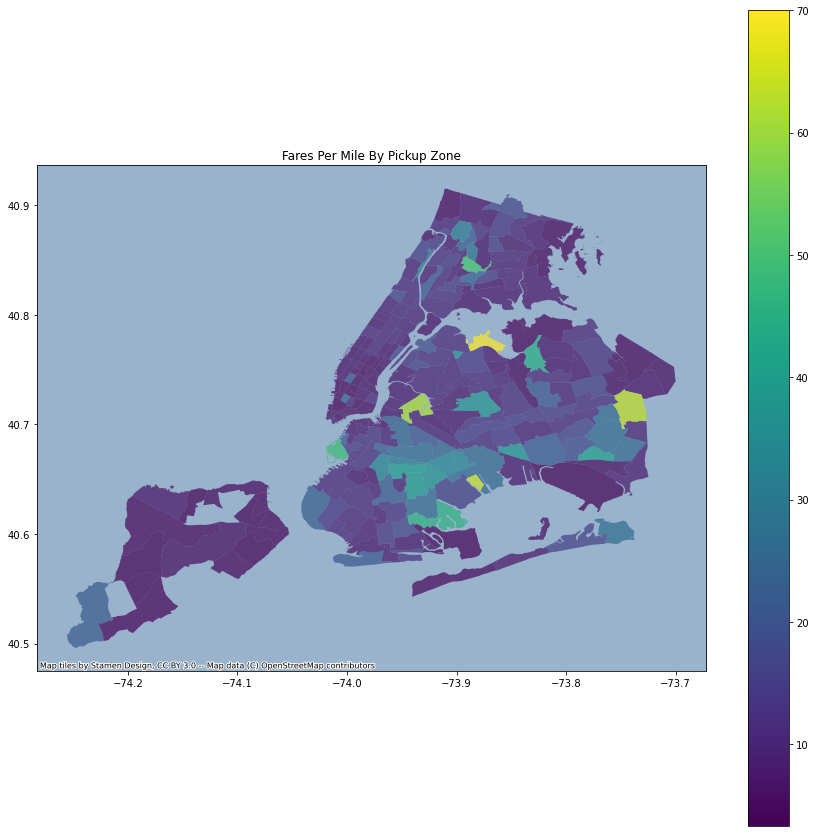

In [10]:
utils.plot_heatmap(fare_per_mile_geom, 'PUGeom', 'fare_per_mile', 'Fares Per Mile By Pickup Zone', 'fares_by_pickupzone', 70)

In [11]:
fare_per_mile2 = utils.aggregateAndGroup(df, 'DOLocationID', 'fare_per_mile', 'mean', True)
fare_per_mile2_geom = utils.merge_location_data(fare_per_mile2, 'DOLocationID', rename_dict = 
                                             {'the_geom':'DOGeom', 'zone': 'DOZone', 'borough': 'DOBorough'})
fare_per_mile_2none = fare_per_mile2_geom.drop('DOGeom', axis=1)
fare_per_mile_2none.sort_values('fare_per_mile', ascending=False).head(10)

,DOLocationID,fare_per_mile,DOZone,DOBorough
79,80,58.250337,East Williamsburg,Brooklyn
77,78,47.301013,East Tremont,Bronx
31,32,46.014459,Bronxdale,Bronx
70,71,42.938750,East Flatbush/Farragut,Brooklyn
198,205,42.825754,Saint Albans,Queens
91,92,39.045690,Flushing,Queens
211,218,36.178304,Springfield Gardens North,Queens
212,219,33.866692,Springfield Gardens South,Queens
54,55,33.535654,Coney Island,Brooklyn
200,207,33.122258,Saint Michaels Cemetery/Woodside,Queens


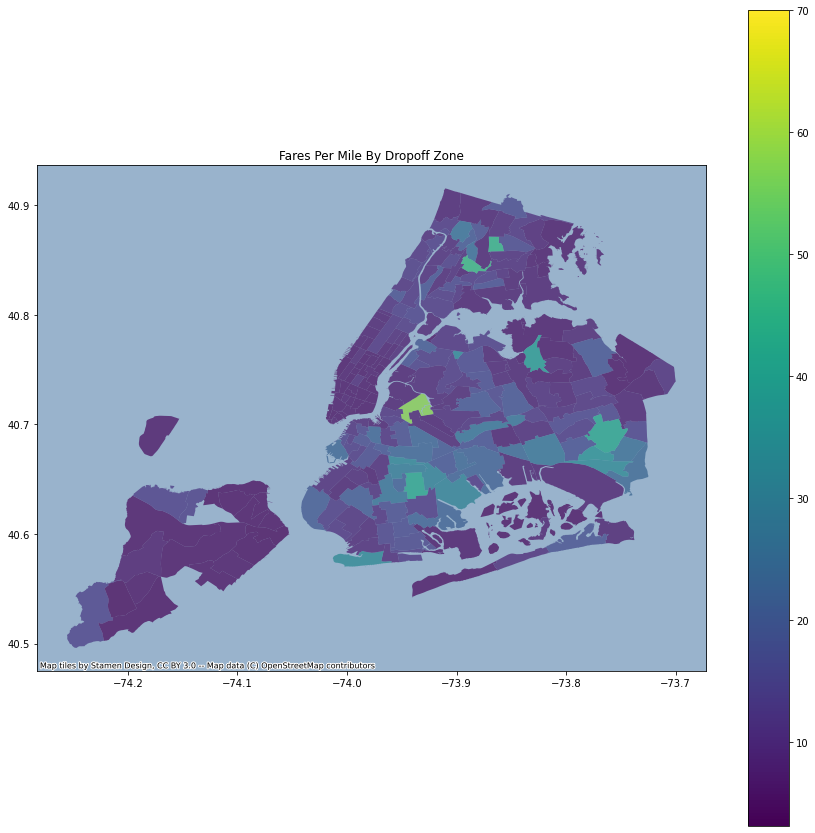

In [12]:
utils.plot_heatmap(fare_per_mile2_geom, 'DOGeom', 'fare_per_mile', 'Fares Per Mile By Dropoff Zone', 'fares_by_dropoffzone', 70)